<a href="https://colab.research.google.com/github/yasarigno/NLP_DeepLearning_Course/blob/main/Exercise_Neural_Networks_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import random
random.seed(2)

import tensorflow as tf
tf.random.set_seed(2)

import numpy as np
np.random.seed(2)

In [3]:
corn_and_olives_dataset = pd.DataFrame.from_dict({
        'shape': ['round', 'oval'],
        'color': ['yellow', 'green'],
        'ingredient_type': ['corn', 'olives']
    }
)

In [4]:
corn_and_olives_dataset

,shape,color,ingredient_type
0,round,yellow,corn
1,oval,green,olives


Convert the data from strings of 'yes' and 'no' to numbers - something the machine can understand:

In [5]:
corn_and_olives_dataset['c_shape'] = corn_and_olives_dataset['shape'].apply(lambda x: 1 if x == 'round' else 0)
corn_and_olives_dataset['c_color'] = corn_and_olives_dataset['color'].apply(lambda x: 1 if x == 'yellow' else 0)
corn_and_olives_dataset['c_ingredient_type'] = corn_and_olives_dataset['ingredient_type'].apply(lambda x: 1 if x == 'corn' else 0)

In [6]:
corn_and_olives_dataset

,shape,color,ingredient_type,c_shape,c_color,c_ingredient_type
0,round,yellow,corn,1,1,1
1,oval,green,olives,0,0,0


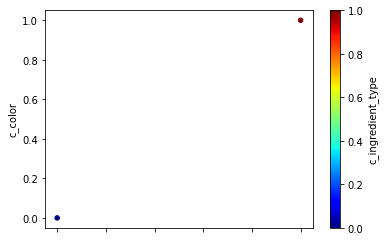

In [7]:
corn_and_olives_dataset.plot(
    kind='scatter', 
    x='c_shape', 
    y='c_color', 
    c='c_ingredient_type', 
    colormap='jet'
)

These two points can be separated by a single line.

In [8]:
from tensorflow.keras.layers import Dense

In [9]:
single_neuron_layer = Dense(
    units=1,
    input_dim=2, 
    activation='sigmoid'
)

In [24]:
loss='binary_crossentropy' 

In [11]:
from tensorflow.keras.optimizers import SGD

In [12]:
sgd = SGD()

In [13]:
from tensorflow.keras.models import Sequential

In [14]:
single_neuron_model = Sequential()

In [15]:
single_neuron_model.add(single_neuron_layer)
single_neuron_model.compile(loss=loss, optimizer=sgd, metrics=['accuracy'])
single_neuron_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


You can see in the summary that we have a single Neuron which outputs a single value, with 3 parameters to train (colour_weight, shape_weight, bias).

In [25]:
history = single_neuron_model.fit(
    corn_and_olives_dataset[['c_shape', 'c_color']], 
    corn_and_olives_dataset[['c_ingredient_type']], 
    epochs=500
)

Epoch 1/500
1/1 [==============================] - 0s 10ms/step - loss: 0.4642 - accuracy: 1.0000
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4638 - accuracy: 1.0000
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 0.4633 - accuracy: 1.0000
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 0.4629 - accuracy: 1.0000
Epoch 5/500
1/1 [==============================] - 0s 9ms/step - loss: 0.4624 - accuracy: 1.0000
Epoch 6/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4620 - accuracy: 1.0000
Epoch 7/500
1/1 [==============================] - 0s 15ms/step - loss: 0.4615 - accuracy: 1.0000
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4611 - accuracy: 1.0000
Epoch 9/500
1/1 [==============================] - 0s 13ms/step - loss: 0.4606 - accuracy: 1.0000
Epoch 10/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4602 - accuracy: 1.0000
Epoch 11/500
1/1 [=======